<a href="https://colab.research.google.com/github/sasaki-akaso270/data_science/blob/main/data_analysis_pref_medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#google driveからdataを読み込むためのコマンド
from google.colab import drive
drive.mount("/content/drive")
#依存関数など
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#this is requirement for plot
# !pip install -U japanmap jupyter matplotlib pandas xlrd

In [73]:
%config InlineBackend.figure_formats = {'png', 'retina'}
%matplotlib inline
import matplotlib.pyplot as plt
from japanmap import picture
plt.rcParams['figure.figsize'] = 6, 6

In [74]:
#都道府県のデータの箇所
pref_data_path = "/content/drive/MyDrive/tyugai_data_analysis/prefecture_list.csv"
pref_df = pd.read_csv(pref_data_path, header=None)
# print(pref_df)

In [75]:
#heatmapを作成する関数 for float
def make_heatmap2(df,n_clusters=3,sex = 0):
  #都道府県の数
  n = 47
  tmp = []
  ind = df.shape[0] // n
  if sex == 0 :
    df2 = df.iloc[:,8]
  else:
    df2 = df.iloc[:,16]
  columns = df2.iloc[0:ind,].index
  for i in range(n):
    t = df2.iloc[0+i*ind:ind+i*ind,]
    # t = df2.iloc[0+i*ind:ind+i*ind,].apply(lambda x: x.replace(',','')).astype(np.int)
    tmp.append([i for i in t.values])
  # 値の確認
  ndf = pd.DataFrame(data = tmp , columns = columns)
  # f_rate = lambda x: x / np.sum(x)
  # ndf2 = ndf.apply(f_rate, axis = 1)
  # クラスタリング
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  clusters = kmeans.fit(ndf)
  ndf['cluster'] = clusters.labels_
  df4 = ndf["cluster"]
  cmap = plt.get_cmap('Reds')
  norm = plt.Normalize(vmin=df4.min(), vmax=df4.max())
  d = {i: '#' + bytes(cmap(norm(df4[i-1]), bytes=True)[:3]).hex() for i in range(1,48)}
  plt.imshow(picture(d))
  return 0
#heatmapを作成する関数

def make_heatmap(df,n_clusters=3,sex = 0):
  #都道府県の数
  n = 47
  tmp = []
  ind = df.shape[0] // n
  if sex == 0 :
    df2 = df.iloc[:,8]
  else:
    df2 = df.iloc[:,16]
  columns = df2.iloc[0:ind,].index
  for i in range(n):
    # t = df2.iloc[0+i*ind:ind+i*ind,]
    t = df2.iloc[0+i*ind:ind+i*ind,].apply(lambda x: x.replace(',','')).astype(np.int)
    tmp.append([i for i in t.values])
  # 値の確認
  ndf = pd.DataFrame(data = tmp , columns = columns)
  f_rate = lambda x: x / np.sum(x)
  ndf2 = ndf.apply(f_rate, axis = 1)
  # クラスタリング
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  clusters = kmeans.fit(ndf2)
  ndf['cluster'] = clusters.labels_
  df4 = ndf["cluster"]
  cmap = plt.get_cmap('Reds')
  norm = plt.Normalize(vmin=df4.min(), vmax=df4.max())
  d = {i: '#' + bytes(cmap(norm(df4[i-1]), bytes=True)[:3]).hex() for i in range(1,48)}
  plt.imshow(picture(d))
  return 0

#関数 for float
def make_dence_heatmap2(df,clas=0,sex=0):
  n = 47
  tmp = []
  ind = df.shape[0] // n
  if sex == 0 :
    df2 = df.iloc[:,8]
  else:
    df2 = df.iloc[:,16]
  columns = df.iloc[0:ind,].index
  for i in range(n):
    # t = df2.iloc[0+i*ind:ind+i*ind,].apply(lambda x: x.replace(',','')).astype(np.int)
    t = df2.iloc[0+i*ind:ind+i*ind,]
    tmp.append([i for i in t.values])
  # 値の確認
  ndf = pd.DataFrame(data = tmp , columns = columns)
  # f_rate = lambda x: x / np.sum(x)
  # ndf2 = ndf.apply(f_rate, axis = 1)
  df3 = ndf.iloc[:,clas]
  cmap = plt.get_cmap('Reds')
  norm = plt.Normalize(vmin=df3.min(), vmax=df3.max())
  d = {i: '#' + bytes(cmap(norm(df3[i-1]), bytes=True)[:3]).hex() for i in range(1,48)}
  plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
  plt.imshow(picture(d))
  return 0

#関数
def make_dence_heatmap(df,clas=0,sex=0):
  n = 47
  tmp = []
  ind = df.shape[0] // n
  if sex == 0 :
    df2 = df.iloc[:,8]
  else:
    df2 = df.iloc[:,16]
  columns = df.iloc[0:ind,].index
  for i in range(n):
    t = df2.iloc[0+i*ind:ind+i*ind,].apply(lambda x: x.replace(',','')).astype(np.int)
    # t = df2.iloc[0+i*ind:ind+i*ind,]
    tmp.append([i for i in t.values])
  # 値の確認
  ndf = pd.DataFrame(data = tmp , columns = columns)
  f_rate = lambda x: x / np.sum(x)
  ndf2 = ndf.apply(f_rate, axis = 1)
  df3 = ndf2.iloc[:,clas]
  cmap = plt.get_cmap('Reds')
  norm = plt.Normalize(vmin=df3.min(), vmax=df3.max())
  d = {i: '#' + bytes(cmap(norm(df3[i-1]), bytes=True)[:3]).hex() for i in range(1,48)}
  plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
  plt.imshow(picture(d))
  return 0

#クラスター数を決めるための関数(エルボー法) for float
def dec_cluster2(df,sex = 0):
  n = 47
  tmp = []
  ind = df.shape[0] // n
  if sex == 0 :
    df2 = df.iloc[:,8]
  else:
    df2 = df.iloc[:,16]
  columns = df.iloc[0:ind,].index
  for i in range(n):
    # t = df2.iloc[0+i*ind:ind+i*ind,].apply(lambda x: x.replace(',','')).astype(np.int)
    t = df2.iloc[0+i*ind:ind+i*ind,]
    tmp.append([i for i in t.values])
  distortions = []
  ndf = pd.DataFrame(data = tmp, columns = columns)
  for i in range(1,20):
    km = KMeans(n_clusters=i,
                init = "k-means++",
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(ndf)
    distortions.append(km.inertia_)
  plt.plot(range(1,20), distortions, marker = "o")
  plt.xlabel("Number of Clusters")
  plt.ylabel("Distortion")
  plt.tight_layout()
  plt.show()
  return 0

#クラスター数を決めるための関数(エルボー法)
def dec_cluster(df,sex = 0):
  n = 47
  tmp = []
  ind = df.shape[0] // n
  if sex == 0 :
    df2 = df.iloc[:,8]
  else:
    df2 = df.iloc[:,16]
  columns = df.iloc[0:ind,].index
  for i in range(n):
    t = df2.iloc[0+i*ind:ind+i*ind,].apply(lambda x: x.replace(',','')).astype(np.int)
    # t = df2.iloc[0+i*ind:ind+i*ind,]
    tmp.append([i for i in t.values])
  distortions = []
  ndf = pd.DataFrame(data = tmp, columns = columns)
  for i in range(1,20):
    km = KMeans(n_clusters=i,
                init = "k-means++",
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(ndf)
    distortions.append(km.inertia_)
  plt.plot(range(1,20), distortions, marker = "o")
  plt.xlabel("Number of Clusters")
  plt.ylabel("Distortion")
  plt.tight_layout()
  plt.show()
  return 0

def make_data(df,indx):
  ind = []
  VAL = 13
  for i in range(47):
    for j in indx:
      ind.append(j+VAL*i)
  new_df = df.iloc[ind, : ]
  return new_df

In [76]:
#都道府県のデータの箇所
#関数の引数
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/bmi_data.csv"
bmi_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/fat_10kg.csv"
fat_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/sport_per2.csv"
sport_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/Waist_cir.csv"
waist_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/Systolic_bp.csv"
Systolic_bp_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/natural_fat.csv"
natural_fat_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/gamma_gt.csv"
gamma_gt_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/various_mean.csv"
vmean_df = pd.read_csv(DATA_PATH)
DATA_PATH = "/content/drive/MyDrive/tyugai_data_analysis/choles.csv"
choles_df = pd.read_csv(DATA_PATH)
N_CLUSTER = 3
SEX = 0
#腹囲，BMI，中性脂肪の平均のデータ
fat_bmi_natural = make_data(vmean_df, [0,1,6])
#空腹時血糖値
bloods_hba1c = make_data(vmean_df, [2,3])
#肝機能に関連するもの
liver = make_data(vmean_df, [9,10,11,12])
#コレステロール
cholesterol = make_data(vmean_df,[7,8])

#男女別に格納
# df_bmi_male = df_bmi.iloc[:,0:7]
# df_bmi_female = df_bmi.iloc[:,9:15]
# #格納できているか確認
# print(df_bmi_male)
# print(df_bmi_female)

0

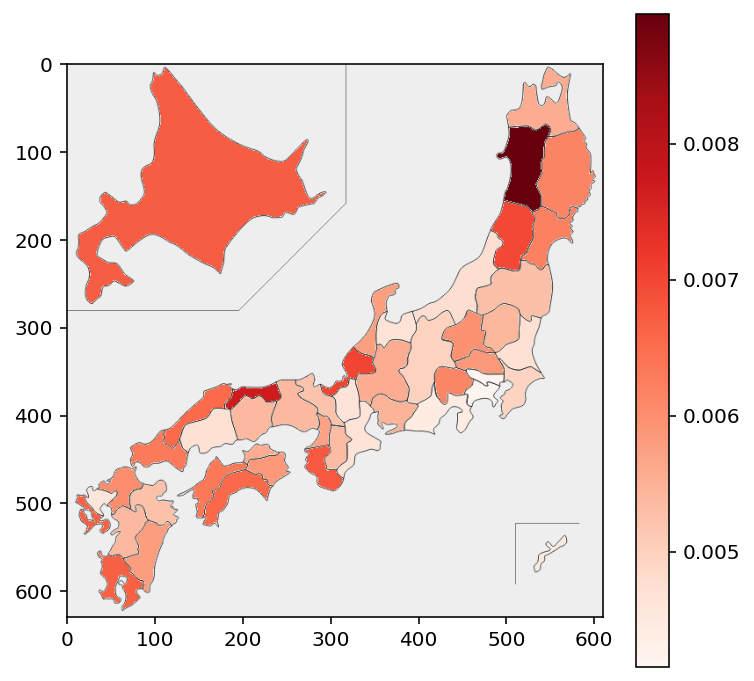

In [77]:
make_dence_heatmap(Systolic_bp_df,0,0)

0

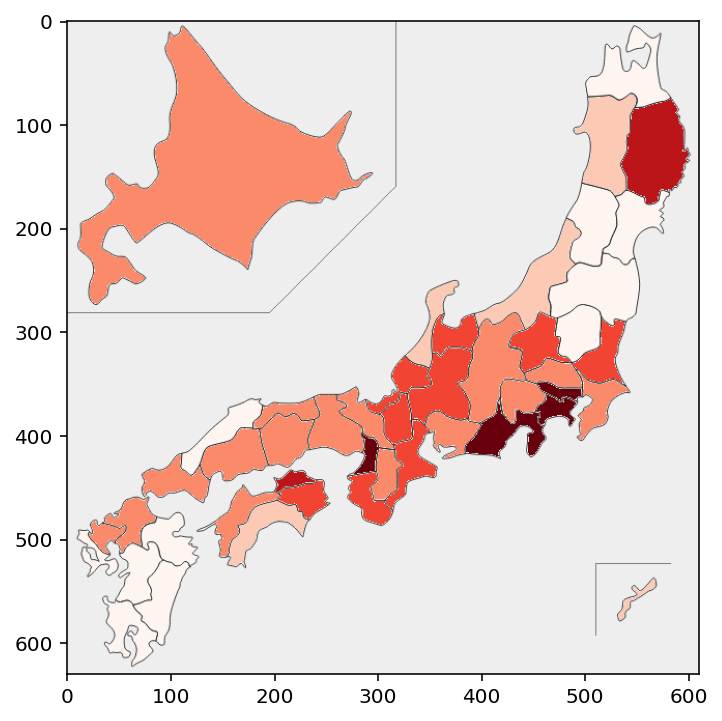

In [78]:
make_heatmap2(vmean_df,6,1)

0

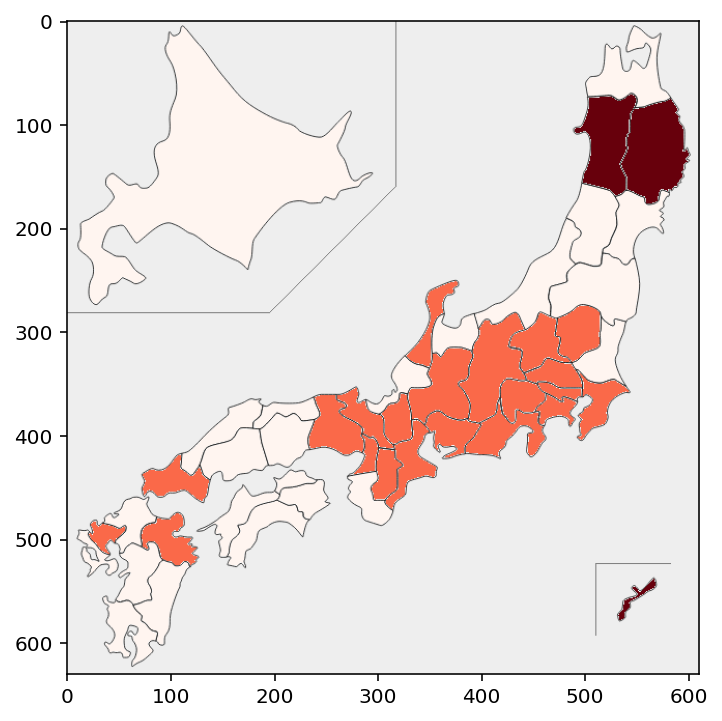

In [79]:
make_heatmap2(vmean_df,3,0)

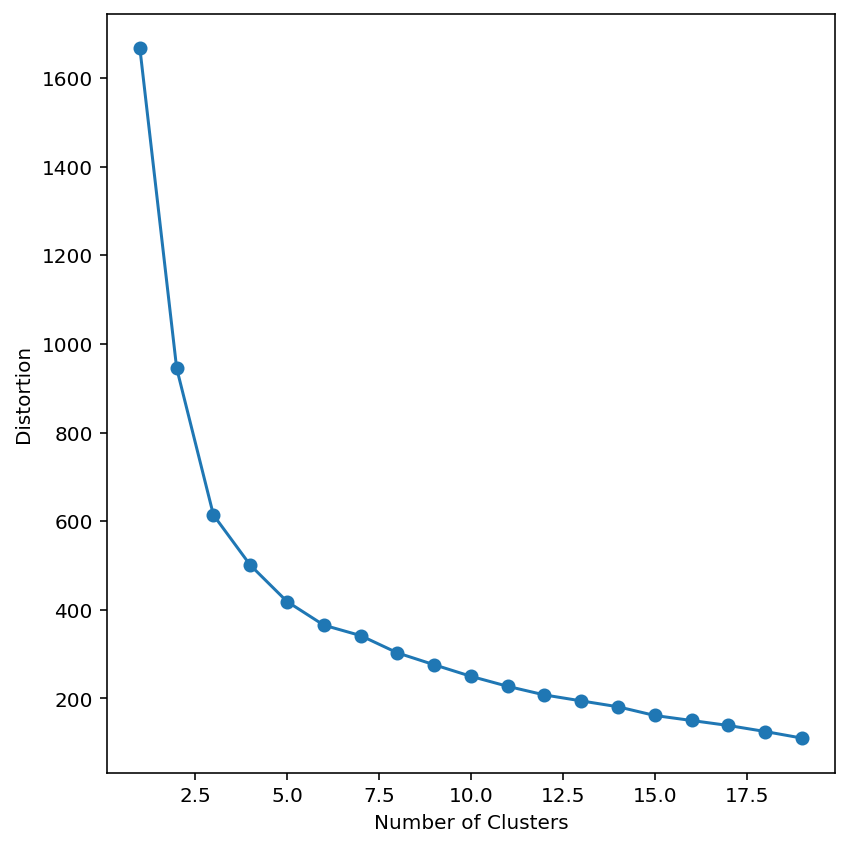

0

In [26]:
dec_cluster2(vmean_df, 0)

0

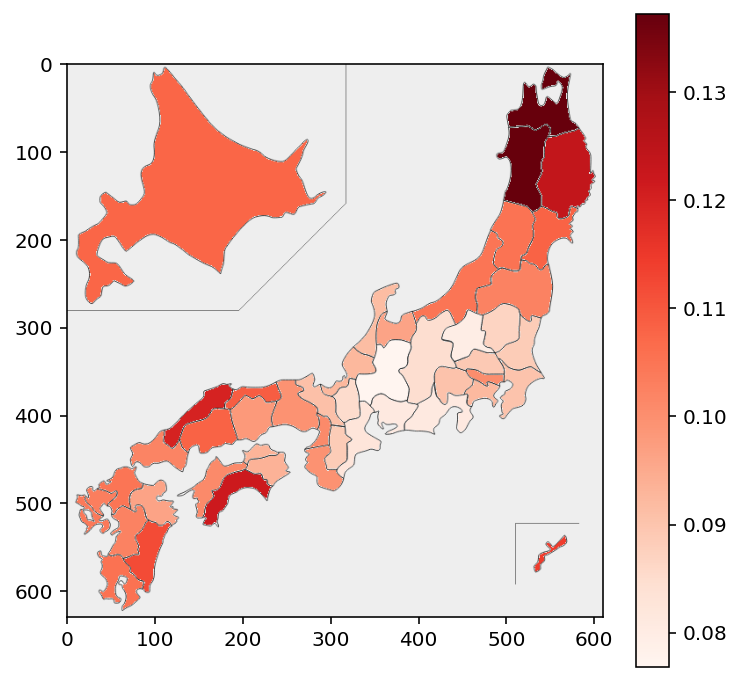

In [75]:
make_dence_heatmap(gamma_gt_df,2,0)

0

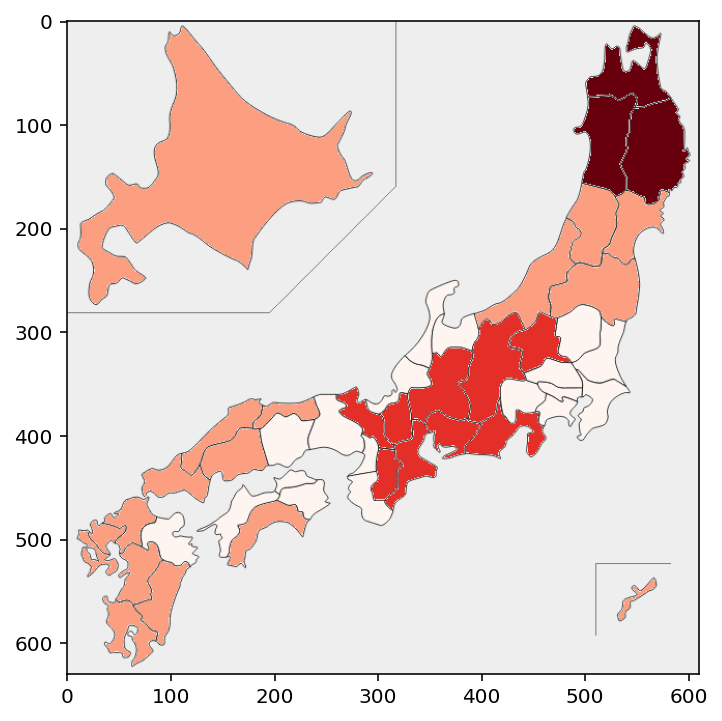

In [76]:
make_heatmap(gamma_gt_df,4,0)

In [48]:
bloods_hba1c = vmean_df.iloc[ind,:]

In [38]:
new_df

,Unnamed: 0,40～44歳,45～49歳,50～54歳,55～59歳,60～64歳,65～69歳,70～74歳,中計,40～44歳.1,45～49歳.1,50～54歳.1,55～59歳.1,60～64歳.1,65～69歳.1,70～74歳.1,中計.1
0,BMI[kg/㎡],24.5,24.6,24.5,24.4,24.2,24.0,23.9,24.4,22.1,22.4,22.4,22.4,22.6,22.8,23.0,22.5
1,腹囲[cm],84.5,85.4,85.7,85.6,85.6,85.5,85.1,85.3,76.8,77.9,78.4,79.2,80.0,80.6,81.3,79.1
6,中性脂肪[mg/dl],135.3,141.1,143.0,139.7,134.7,128.9,122.9,136.5,79.2,85.3,93.7,99.4,102.9,106.8,107.6,95.7
13,BMI[kg/㎡],24.6,24.5,24.4,24.1,24.1,23.9,23.7,24.2,22.5,22.7,22.8,22.8,23.0,23.2,23.3,22.9
14,腹囲[cm],84.7,85.1,85.0,84.7,84.7,84.5,84.1,84.7,77.7,78.6,79.4,80.1,80.9,81.5,82.1,80.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,腹囲[cm],84.8,85.5,85.6,85.4,85.2,85.3,85.0,85.3,77.7,79.3,80.1,80.9,81.5,82.3,83.1,80.9
591,中性脂肪[mg/dl],140.0,144.9,144.1,139.0,132.9,124.2,113.5,134.9,76.8,84.2,91.5,96.5,100.6,102.9,101.7,94.6
598,BMI[kg/㎡],25.1,25.3,25.2,25.1,24.9,24.8,24.7,25.1,22.9,23.2,23.3,23.5,23.8,24.1,24.4,23.5
599,腹囲[cm],86.4,87.4,87.4,87.6,87.8,87.9,87.7,87.4,79.5,80.7,81.4,82.4,83.7,84.9,85.8,82.4


0

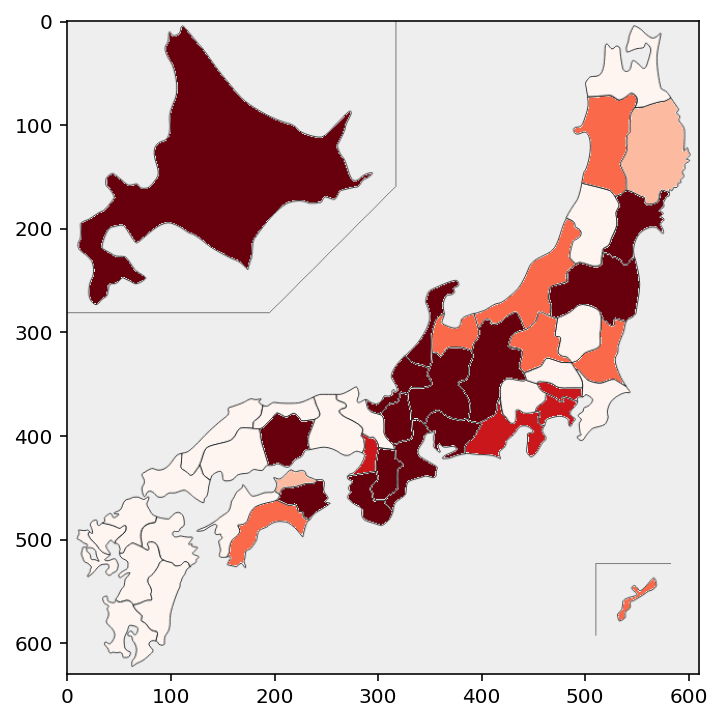

In [44]:
make_heatmap2(new_df,5,1)

0

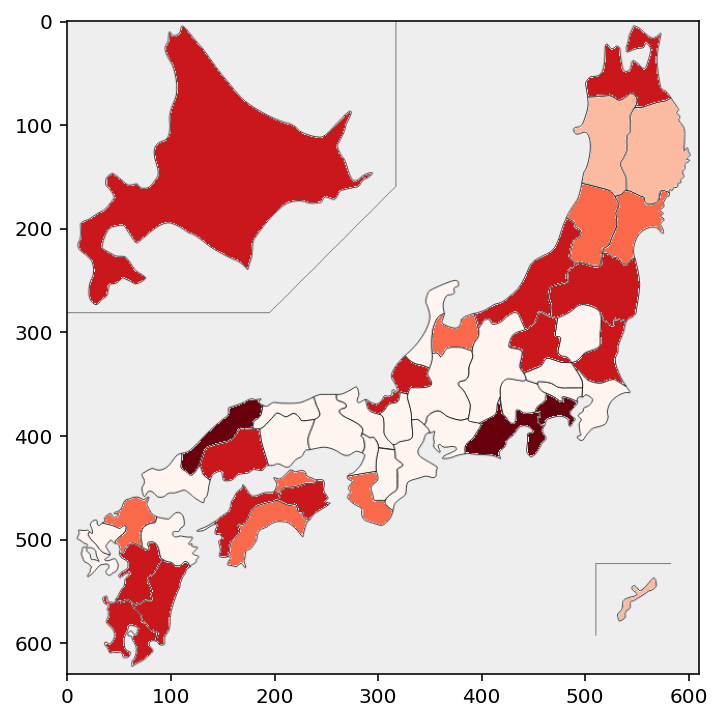

In [45]:
make_heatmap2(new_df,5,0)

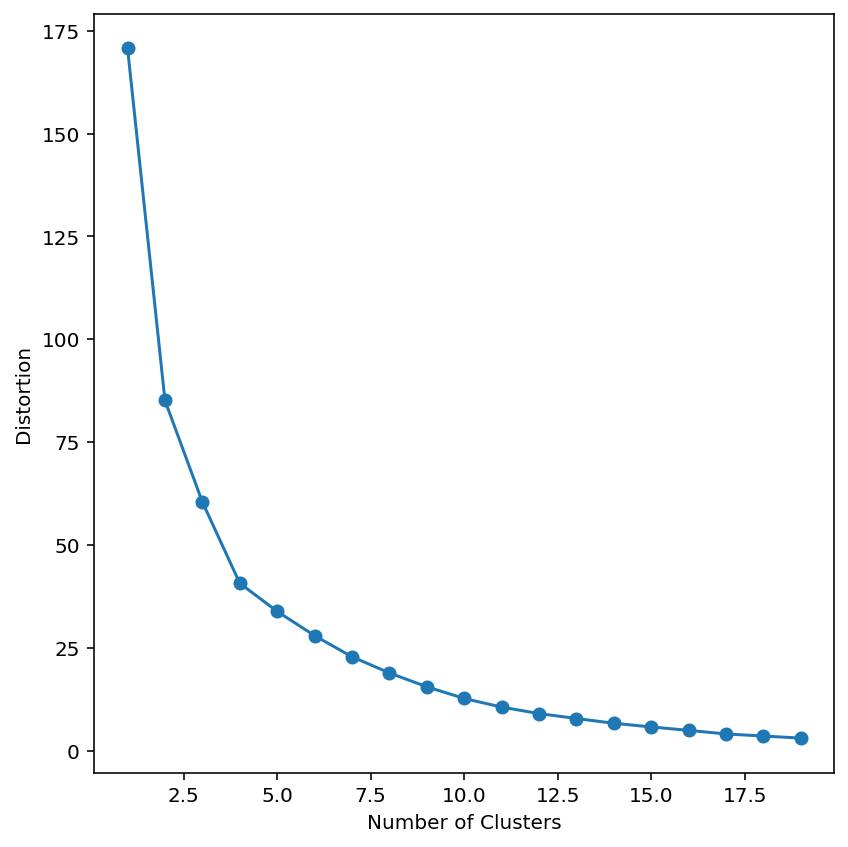

0

In [67]:
 dec_cluster2(cholesterol,1)

0

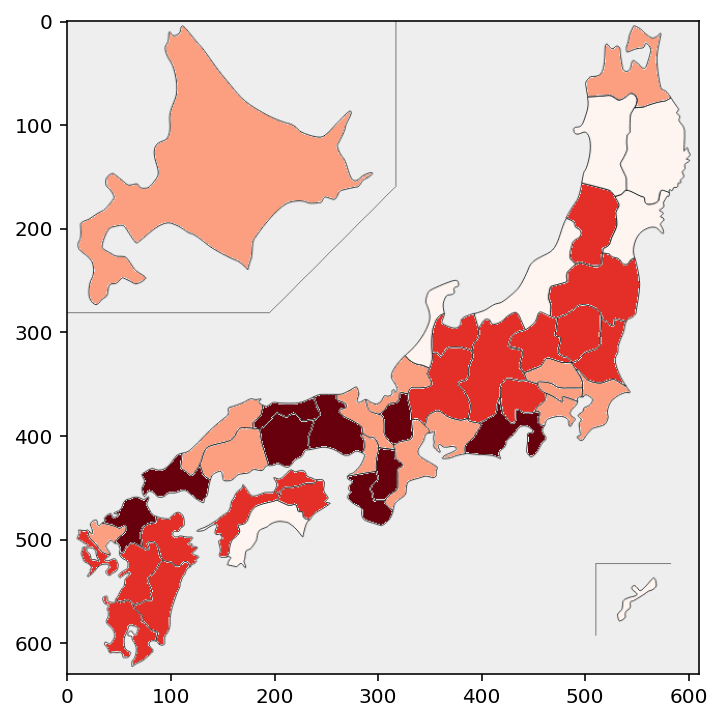

In [68]:
make_heatmap2(cholesterol,4,sex = 1)

0

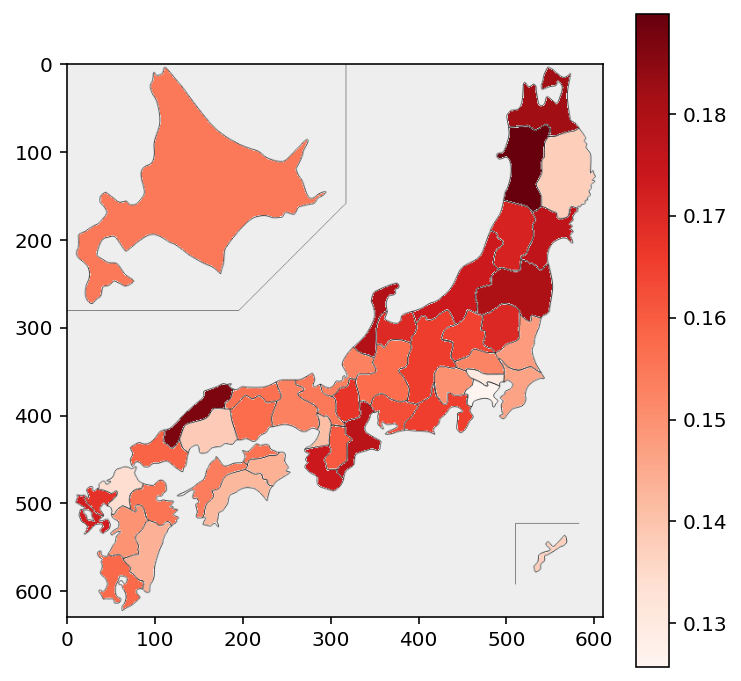

In [69]:
make_dence_heatmap(choles_df,sex=1)